# Atlas of all graphs of 6 nodes or less.

Author: Aric Hagberg <hagberg@lanl.gov>

Copyright (C) 2004-2016 by Aric Hagberg <hagberg@lanl.gov>, Dan Schult <dschult@colgate.edu>, Pieter Swart <swart@lanl.gov>.

All rights reserved.
BSD license.

First, we create a function that returns the disjoint union of each nonisomorphic connected graph on six or fewer nodes.

In [1]:
%matplotlib inline
import networkx as nx
from networkx.generators.atlas import graph_atlas_g
from networkx.algorithms.isomorphism.isomorph import graph_could_be_isomorphic as isomorphic
import matplotlib.pyplot as plt
import random
try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either PyGraphviz or pydot")

In [2]:
def atlas6():
    """ Return the atlas of all connected graphs of 6 nodes or less.
        Attempt to check for isomorphisms and remove.
    """

    Atlas = graph_atlas_g()[0:208] # 208
    # remove isolated nodes, only connected graphs are left
    U = nx.Graph() # graph for union of all graphs in atlas
    for G in Atlas:
        zerodegree = [n for n in G if G.degree(n)==0]
        for n in zerodegree:
            G.remove_node(n)
        U = nx.disjoint_union(U, G)

    # list of graphs of all connected components
    C = [U.subgraph(c) for c in nx.connected_components(U)]

    UU = nx.Graph()
    # do quick isomorphic-like check, not a true isomorphism checker
    nlist = [] # list of nonisomorphic graphs
    for G in C:
        # check against all nonisomorphic graphs so far
        if not any(isomorphic(G, H) for H in nlist):
            nlist.append(G)
            UU = nx.disjoint_union(UU, G) # union the nonisomorphic graphs
    return UU

Create the graph and count the number of its nodes, edges, and connected components.

In [3]:
G = atlas6()

print("graph has %d nodes with %d edges" % (nx.number_of_nodes(G), nx.number_of_edges(G)))
print(nx.number_connected_components(G), "connected components")

graph has 779 nodes with 1073 edges
137 connected components


Compute a layout for the graph and draw the graph with this layout. Color the nodes of each connected subgraph a random color.

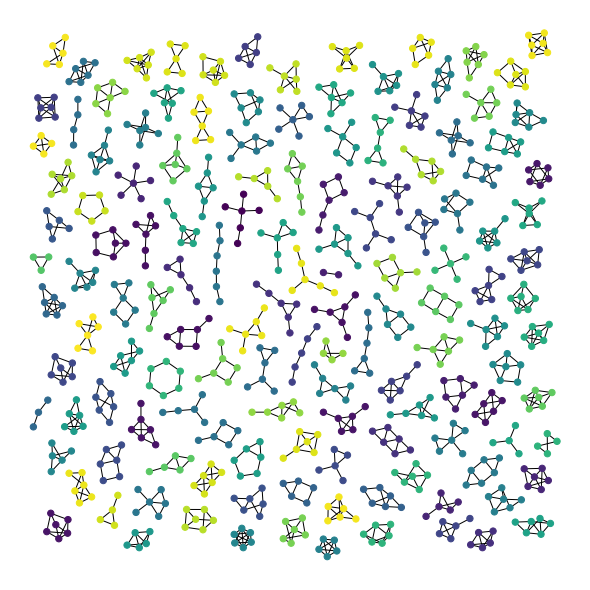

In [4]:
plt.figure(1, figsize=(8, 8))
# layout graphs with positions using graphviz neato
pos = graphviz_layout(G, prog="neato")
# color nodes the same in each connected subgraph
C = [G.subgraph(c) for c in nx.connected_components(G)]
for g in C:
    c = [random.random()] * nx.number_of_nodes(g) # random color...
    nx.draw(g,
            pos,
            node_size=40,
            node_color=c,
            vmin=0.0,
            vmax=1.0,
            with_labels=False
            )
plt.show()